In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.fft import fft 
import matplotlib.pyplot as plt

## Data Processing

In [3]:
# Load and preprocess data
df = pd.read_csv('../22_HP/outputs/simulation_results_nand.csv')
df = df.drop(columns=['delay_LH_NodeA','delay_HL_NodeA','delay_LH_NodeB','delay_HL_NodeB'], axis=1)

In [4]:
df.head()

,Vin_A,Vin_B,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
0,0.0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.136609e-08
1,0.0,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.114162e-08
2,1.0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,6.543595e-09
3,1.0,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.866817e-08
4,0.0,0.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,9.145988e-09


In [5]:
df.describe()

,Vin_A,Vin_B,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,0.500000,0.500000,34.362600,0.999048,2.511981e-15,4.503877e-08,4.500441e-08,9.002687e-10,8.996303e-10,9.003235e-10,9.200230e-10,9.202474e-10,9.208007e-10,6.500293e-10,1.399542e-08,1.401062e-08,6.498297e+18,2.799952e+18,1.272208e-08
std,0.500006,0.500006,52.127050,0.058259,1.435116e-15,1.493685e-09,1.485418e-09,2.972510e-11,3.026050e-11,2.993862e-11,3.073110e-11,3.071142e-11,3.079464e-11,2.175375e-11,4.665974e-10,4.640081e-10,2.137011e+17,9.311797e+16,1.107019e-08
min,0.000000,0.000000,-54.986959,0.900033,1.035900e-17,4.015305e-08,3.938417e-08,7.666010e-10,7.602014e-10,7.868514e-10,7.979490e-10,8.003992e-10,8.051369e-10,5.724874e-10,1.173568e-08,1.244580e-08,5.739411e+18,2.435456e+18,4.540209e-10
25%,0.000000,0.000000,-10.844191,0.948592,1.256067e-15,4.403489e-08,4.397007e-08,8.805222e-10,8.795919e-10,8.801323e-10,8.994353e-10,8.997851e-10,9.000814e-10,6.354986e-10,1.368186e-08,1.369309e-08,6.352741e+18,2.736722e+18,6.125763e-09
50%,0.500000,0.500000,33.830185,0.998653,2.520102e-15,4.504623e-08,4.502020e-08,9.004051e-10,8.998323e-10,9.005850e-10,9.199003e-10,9.201744e-10,9.208642e-10,6.498078e-10,1.399949e-08,1.400450e-08,6.497865e+18,2.801193e+18,9.706318e-09
75%,1.000000,1.000000,79.692719,1.049947,3.755893e-15,4.603464e-08,4.600447e-08,9.199819e-10,9.201116e-10,9.205995e-10,9.404933e-10,9.408495e-10,9.417332e-10,6.647795e-10,1.431343e-08,1.431982e-08,6.641405e+18,2.862151e+18,1.542349e-08
max,1.000000,1.000000,124.996031,1.099992,4.999631e-15,5.073782e-08,5.021168e-08,1.014954e-09,1.014115e-09,1.011088e-09,1.032195e-09,1.033069e-09,1.043273e-09,7.428602e-10,1.579761e-08,1.582100e-08,7.419051e+18,3.151342e+18,1.283613e-07


In [6]:
df.dtypes

Vin_A       float64
Vin_B       float64
temp        float64
pvdd        float64
cqload      float64
lmin        float64
wmin        float64
toxe_n      float64
toxm_n      float64
toxref_n    float64
toxe_p      float64
toxm_p      float64
toxref_p    float64
toxp_par    float64
xj_n        float64
xj_p        float64
ndep_n      float64
ndep_p      float64
leakage     float64
dtype: object

In [7]:
# split into input (X) and output (y) variables
x = df.drop(columns=['leakage'], axis=1).values
y = df['leakage'].values

## Training and Testing

In [8]:
def train_and_test(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2

**Non-linear Relationships:** The dataset may contain non-linear relationships between input features
and target variables (leakage and delay) with influencing factors like temperature, voltage, and load conditions. 

**Continuous Target Variable:** Leakage power is a continuous value, making regression models suitable for prediction.

**Robustness**: They are robust to outliers and noise in the data, which might be present in real-world
datasets like the one under consideration.

Gradient Boosting models excel at capturing these non-linear relationships by building ensembles of weak decision trees, progressively improving predictions with each iteration.


### Linear Regression

In [9]:
def train_and_test_linear_reg(x, y):
  
  model = LinearRegression()
  return train_and_test(model, x, y)

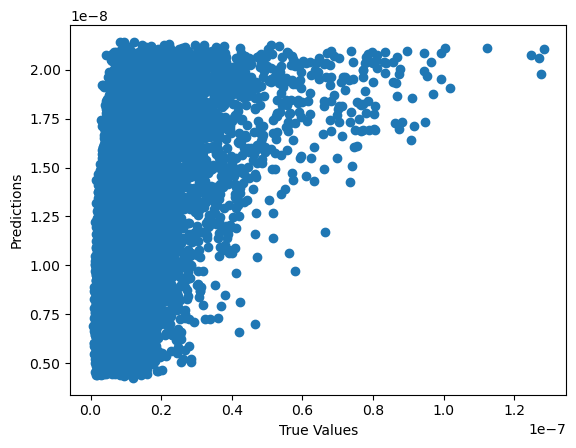

MSE: 1.0152560995228213e-16, R2: 0.17471412277385678


In [10]:
def train_and_test_lr(x, y):
    model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #plot
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

    return mse, r2

mse, r2 = train_and_test_lr(x, y)
print(f'MSE: {mse}, R2: {r2}')


### Adaboost

In [11]:
from sklearn.ensemble import AdaBoostRegressor

def train_and_test_adaboost(x, y):

  model = AdaBoostRegressor(random_state=42)
  return train_and_test(model, x, y)

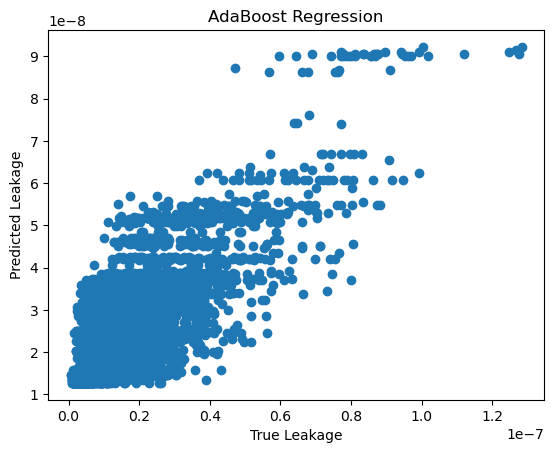

MSE: 1.3638890430300284e-16, R2: -0.10868416929009572


In [12]:
def train_and_test_ab(x,y):
    model = AdaBoostRegressor(random_state=42)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Leakage')
    plt.ylabel('Predicted Leakage')
    plt.title('AdaBoost Regression')
    plt.show()

    return mse, r2

mse, r2 = train_and_test_ab(x, y)
print(f'MSE: {mse}, R2: {r2}')




### XGBoost

In [13]:
import xgboost as xgb

def train_and_test_xgboost(x, y):
      
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                  max_depth = 5, alpha = 10, n_estimators = 10)
    return train_and_test(model, x, y)

mse_xg, r2_xg = train_and_test_xgboost(x, y)
print("\nXGBoost Model Performance:")
print("Mean Squared Error:", mse_xg)
print("R2 Score:", r2_xg)


XGBoost Model Performance:
Mean Squared Error: 1.230189438563328e-16
R2 Score: -1.8423294894098774e-06


### LightGBM

In [14]:
def train_and_test_lightgbm(x, y):
      
    model = lgb.LGBMRegressor()
    return train_and_test(model, x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Feature ranking:
1. feature 3 (531.000000)
2. feature 10 (493.000000)
3. feature 0 (376.000000)
4. feature 1 (366.000000)
5. feature 2 (349.000000)
6. feature 7 (333.000000)
7. feature 11 (158.000000)
8. feature 5 (135.000000)
9. feature 6 (87.000000)
10. feature 12 (42.000000)
11. feature 8 (37.000000)
12. feature 13 (33.000000)
13. feature 9 (27.000000)
14. feature 16 (12.000000)
15. feature 17 (9.000000)
16. feature 14 (6.000000)
17. feature 4 (3.000000)
18. feature 15 (3.000000)
Mean Squared Error: 2.2366763187613596e-18
R2 Score: 0.9818184064230937


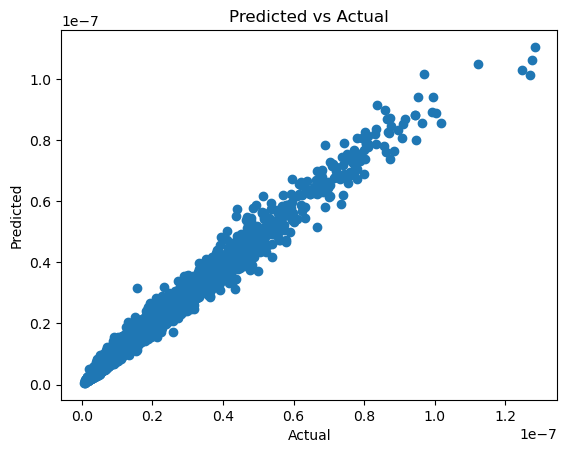

In [15]:

import lightgbm as lgb
import matplotlib.pyplot as plt

def train_and_test_lgbm(x, y):
        
     model = lgb.LGBMRegressor()
     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

     model.fit(x_train, y_train)
     y_pred = model.predict(x_test)

     # plot pred vs actual 
     plt.scatter(y_test, y_pred)
     plt.xlabel('Actual')
     plt.ylabel('Predicted')
     plt.title('Predicted vs Actual')
     # plt.show()

     importances = model.feature_importances_
     indices = np.argsort(importances)[::-1]
     features = df.columns

     # Print the feature ranking
     print("Feature ranking:")
     for f in range(x_train.shape[1]):
         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

     mse = mean_squared_error(y_test, y_pred)
     r2 = r2_score(y_test, y_pred)
     return mse, r2

mse_lgb, r2_lgb = train_and_test_lgbm(x, y)

print("Mean Squared Error:", mse_lgb)
print("R2 Score:", r2_lgb)



In [16]:
# Creating a list of feature names and importances
feature_names = ["feature " + str(i) for i in range(18)]
feature_importances = [512, 494, 384, 377, 374, 334, 158, 126, 84, 45, 35, 33, 24, 7, 6, 3, 2, 2]

feature_ranking_df = pd.DataFrame(list(zip(feature_names, feature_importances)), 
                                 columns = ['Feature', 'Importance'])
feature_ranking_df = feature_ranking_df.sort_values(by=['Importance'], ascending=False)
feature_ranking_df


,Feature,Importance
0,feature 0,512
1,feature 1,494
2,feature 2,384
3,feature 3,377
4,feature 4,374
5,feature 5,334
6,feature 6,158
7,feature 7,126
8,feature 8,84
9,feature 9,45


### Cat Boost Regressor

In [17]:
from catboost import CatBoostRegressor

def train_and_test_catboost(x, y):
    
  model = CatBoostRegressor(random_state=42) 
  return train_and_test(model, x, y)

Learning rate set to 0.069316
0:	learn: 0.0000000	total: 50.1ms	remaining: 50s
1:	learn: 0.0000000	total: 56.6ms	remaining: 28.2s
2:	learn: 0.0000000	total: 60.7ms	remaining: 20.2s
3:	learn: 0.0000000	total: 65.7ms	remaining: 16.4s
4:	learn: 0.0000000	total: 72.5ms	remaining: 14.4s
5:	learn: 0.0000000	total: 76.1ms	remaining: 12.6s
6:	learn: 0.0000000	total: 79.4ms	remaining: 11.3s
7:	learn: 0.0000000	total: 86.7ms	remaining: 10.8s
8:	learn: 0.0000000	total: 91.5ms	remaining: 10.1s
9:	learn: 0.0000000	total: 96.2ms	remaining: 9.52s
10:	learn: 0.0000000	total: 105ms	remaining: 9.43s
11:	learn: 0.0000000	total: 110ms	remaining: 9.03s
12:	learn: 0.0000000	total: 119ms	remaining: 9.01s
13:	learn: 0.0000000	total: 123ms	remaining: 8.65s
14:	learn: 0.0000000	total: 126ms	remaining: 8.25s
15:	learn: 0.0000000	total: 128ms	remaining: 7.89s
16:	learn: 0.0000000	total: 132ms	remaining: 7.61s
17:	learn: 0.0000000	total: 135ms	remaining: 7.36s
18:	learn: 0.0000000	total: 140ms	remaining: 7.25s
19:

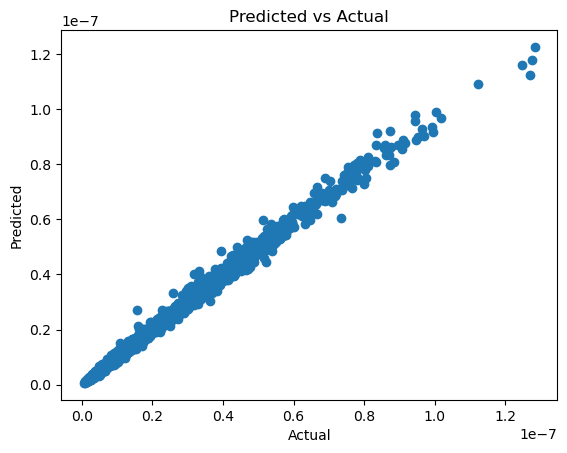

In [18]:
def train_and_test_cb(x, y):
    
  model = CatBoostRegressor(random_state=42) 
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # plot pred vs actual
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Predicted vs Actual')
  plt.show()

  return mse, r2

mse_cb, r2_cb = train_and_test_cb(x, y)

### Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

def train_and_test_random_forest(x, y):
     
      model = RandomForestRegressor(random_state=42)
      return train_and_test(model, x, y)

mse_rf, r2_rf = train_and_test_random_forest(x, y)
print("\nRandom Forest Model Performance:")
print("Mean Squared Error:", mse_rf)
print("R2 Score:", r2_rf)


Random Forest Model Performance:
Mean Squared Error: 1.2301893370627395e-16
R2 Score: -1.7598212411762404e-06


In [20]:
mse_lr, r2_lr = train_and_test_linear_reg(x, y)
mse_ada, r2_ada = train_and_test_adaboost(x, y)
mse_lgb, r2_lgb = train_and_test_lightgbm(x, y)
mse_catboost, r2_catboost = train_and_test_catboost(x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 3.33ms	remaining: 3.33s
1:	learn: 0.0000000	total: 6.26ms	remaining: 3.12s
2:	learn: 0.0000000	total: 10.3ms	remaining: 3.42s
3:	learn: 0.0000000	total: 14.6ms	remaining: 3.64s
4:	learn: 0.0000000	total: 18.6ms	remaining: 3.7s
5:	learn: 0.0000000	total: 21ms	remaining: 3.48s
6:	learn: 0.0000000	total: 25.4ms	remaining: 3.6s
7:	learn: 0.0000000	total: 31.1ms	remaining: 3.86s
8:	learn: 0.0000000	total: 35.4ms	remaining: 3.9s
9:	learn: 0.0000000	total: 39.3ms	remaining: 3.89s
10:	learn: 0.0000000	total: 44.5ms	remaining: 4s
11:	learn: 0.0000000	total: 49.3ms	remaining: 4.05s
12:	learn: 0.0000000	t

In [21]:
print("Model Performance Before Transformation\n")

print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse_lr)
print("R2 Score:", r2_lr)

print("\nAdaBoost Model Performance:")
print("Mean Squared Error:", mse_ada)
print("R2 Score:", r2_ada)

print("\nLightGBM Model Performance:")
print("Mean Squared Error:", mse_lgb)
print("R2 Score:", r2_lgb)

print("\nCatBoost Model Performance:")
print("Mean Squared Error:", mse_catboost)
print("R2 Score:", r2_catboost)

r2_scores_no_transformation = [r2_lr, r2_ada, r2_lgb, r2_catboost] 
mse_scores_no_transformation = [mse_lr, mse_ada, mse_lgb, mse_catboost]
model_names = ['Linear Regression', 'AdaBoost', 'LightGBM', 'CatBoost']

Model Performance Before Transformation

Linear Regression Model Performance:
Mean Squared Error: 1.0152560995228213e-16
R2 Score: 0.17471412277385678

AdaBoost Model Performance:
Mean Squared Error: 1.3638890430300284e-16
R2 Score: -0.10868416929009572

LightGBM Model Performance:
Mean Squared Error: 2.2366763187613596e-18
R2 Score: 0.9818184064230937

CatBoost Model Performance:
Mean Squared Error: 5.269388109071569e-19
R2 Score: 0.995716596442923


## Transformations

In [22]:
# function to plot r2 scores for different models for each transformation
def plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_transformation, model_names, transformation_name):

    model_indices = range(len(model_names))
    plt.figure(figsize=(12, 8))
    for i, model_name in enumerate(model_names, start=1):
        plt.subplot(2, 2, i)
        plt.plot(model_indices, r2_scores_no_transformation, marker='o', color='blue', label='Without Transformation')
        plt.plot(model_indices, r2_scores_with_transformation, marker='o', color='green', label=f'With {transformation_name} Transformation')
        plt.title(model_name)
        plt.xlabel('Models')
        plt.ylabel('R2 Score')
        plt.xticks(model_indices, model_names, rotation=45)
        plt.legend()

    plt.tight_layout()
    plt.show()



In [23]:
# standard scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

mse_lr_ss, r2_lr_ss = train_and_test_linear_reg(x_scaled, y)
mse_ada_ss, r2_ada_ss = train_and_test_adaboost(x_scaled, y)
mse_lgb_ss, r2_lgb_ss = train_and_test_lightgbm(x_scaled, y)
mse_catboost_ss, r2_catboost_ss = train_and_test_catboost(x_scaled, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 4.02ms	remaining: 4.01s
1:	learn: 0.0000000	total: 6.77ms	remaining: 3.38s
2:	learn: 0.0000000	total: 10.8ms	remaining: 3.58s
3:	learn: 0.0000000	total: 13.9ms	remaining: 3.46s
4:	learn: 0.0000000	total: 18.2ms	remaining: 3.63s
5:	learn: 0.0000000	total: 21ms	remaining: 3.48s
6:	learn: 0.0000000	total: 24.4ms	remaining: 3.46s
7:	learn: 0.0000000	total: 27.5ms	remaining: 3.41s
8:	learn: 0.0000000	total: 29.9ms	remaining: 3.29s
9:	learn: 0.0000000	total: 34.2ms	remaining: 3.38s
10:	learn: 0.0000000	total: 38.2ms	remaining: 3.43s
11:	

In [24]:
print("Model Performance After Standard Scaling\n")
print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse_lr_ss)
print("R2 Score:", r2_lr_ss)

print("\nAdaBoost Model Performance:")
print("Mean Squared Error:", mse_ada_ss)
print("R2 Score:", r2_ada_ss)

print("\nLightGBM Model Performance:")
print("Mean Squared Error:", mse_lgb_ss)
print("R2 Score:", r2_lgb_ss)

print("\nCatBoost Model Performance:")
print("Mean Squared Error:", mse_catboost_ss)
print("R2 Score:", r2_catboost_ss)

r2_scores_with_ss = [r2_lr_ss, r2_ada_ss, r2_lgb_ss, r2_catboost_ss]
mse_scores_with_ss = [mse_lr_ss, mse_ada_ss, mse_lgb_ss, mse_catboost_ss]

Model Performance After Standard Scaling

Linear Regression Model Performance:
Mean Squared Error: 5.759237526350362e-17
R2 Score: 0.531840547786737

AdaBoost Model Performance:
Mean Squared Error: 1.0392358876195854e-16
R2 Score: 0.1552213263607778

LightGBM Model Performance:
Mean Squared Error: 2.142238113212887e-18
R2 Score: 0.9825860798933281

CatBoost Model Performance:
Mean Squared Error: 5.201129065305277e-19
R2 Score: 0.9957720831569056


### PCA

- To reduce data dimensionality while capturing the most significant information. In leakage power prediction, this can be helpful if the original features have a lot of redundancy or noise. 

In [25]:
from sklearn.decomposition import PCA

# pca components much retain 95% of the variance
pca = PCA(n_components=0.95)  
x_pca = pca.fit_transform(x_scaled)

In [26]:
mse_lr_pca, r2_lr_pca = train_and_test_linear_reg(x_pca, y)
mse_ada_pca, r2_ada_pca = train_and_test_adaboost(x_pca, y)
mse_lgb_pca, r2_lgb_pca = train_and_test_lightgbm(x_pca, y)
mse_catboost_pca, r2_catboost_pca = train_and_test_catboost(x_pca, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 7.79ms	remaining: 7.78s
1:	learn: 0.0000000	total: 14.1ms	remaining: 7.02s
2:	learn: 0.0000000	total: 18.8ms	remaining: 6.26s
3:	learn: 0.0000000	total: 23.5ms	remaining: 5.86s
4:	learn: 0.0000000	total: 27.6ms	remaining: 5.48s
5:	learn: 0.0000000	total: 31.2ms	remaining: 5.16s
6:	learn: 0.0000000	total: 34ms	remaining: 4.82s
7:	learn: 0.0000000	total: 38.4ms	remaining: 4.76s
8:	learn: 0.0000000	total: 41ms	remaining: 4.52s
9:	learn: 0.0000000	total: 44.5ms	remaining: 4.4s
10:	learn: 0.0000000	total: 46.8ms	remaining: 4.21s
11:	learn: 0.0000000	total: 49ms	remaining: 4.03s
12:	learn: 0.0000000	

In [27]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_pca)
print("  R2 Score:", r2_lr_pca)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_pca)
print("  R2 Score:", r2_ada_pca)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_pca)
print("  R2 Score:", r2_lgb_pca)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_pca)
print("  R2 Score:", r2_catboost_pca)

# R2 scores for models with the 'PCA' transformation
r2_scores_with_pca = [r2_lr_pca, r2_ada_pca, r2_lgb_pca, r2_catboost_pca]
mse_scores_with_pca = [mse_lr_pca, mse_ada_pca, mse_lgb_pca, mse_catboost_pca]

Linear Regression:
  Mean Squared Error: 5.759237526350362e-17
  R2 Score: 0.531840547786737

AdaBoost:
  Mean Squared Error: 1.5266108794433766e-16
  R2 Score: -0.24095821676575957

LightGBM:
  Mean Squared Error: 1.7609384616289533e-17
  R2 Score: 0.8568560539818714

CatBoost:
  Mean Squared Error: 1.1246723857309819e-17
  R2 Score: 0.908577132716931


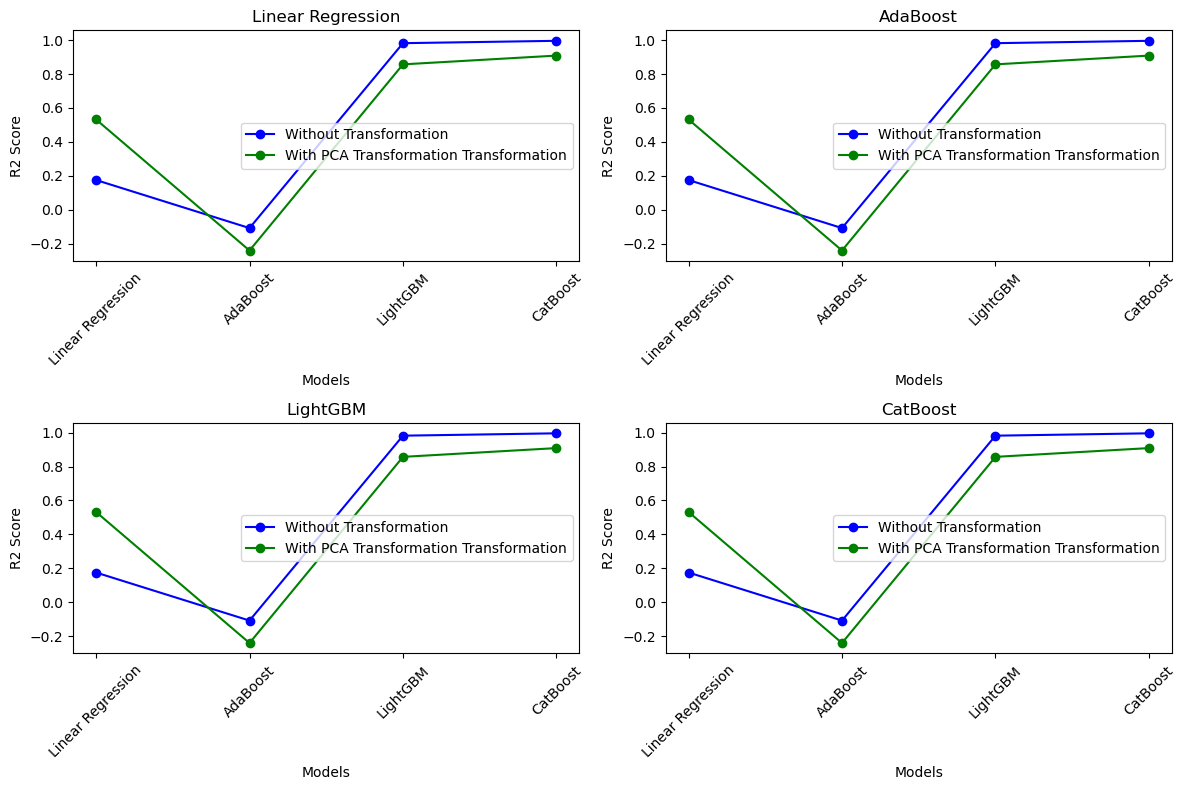

In [28]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_pca, model_names, "PCA Transformation")

> Linear regression assumes linear relationships between features and the target variable. PCA excels at capturing linear relationships in the data. Leakage power has a primarily linear relationship with the original features, PCA will likely retain the most relevant information. 

> Other models like AdaBoost, LightGBM, and CatBoost are more flexible and can capture non-linear relationships. PCA might discard some of this valuable non-linear information, leading to a decrease in R-squared score for these models.

### Feature Engineering  

##### Transforming raw data into features that are more suitable. We identified that x3,x10,x0,x1 so on have high importance scores, so we will consider their relationship with leakage.

In [29]:
feature_ranking_df

,Feature,Importance
0,feature 0,512
1,feature 1,494
2,feature 2,384
3,feature 3,377
4,feature 4,374
5,feature 5,334
6,feature 6,158
7,feature 7,126
8,feature 8,84
9,feature 9,45


Text(0, 0.5, 'Leakage')

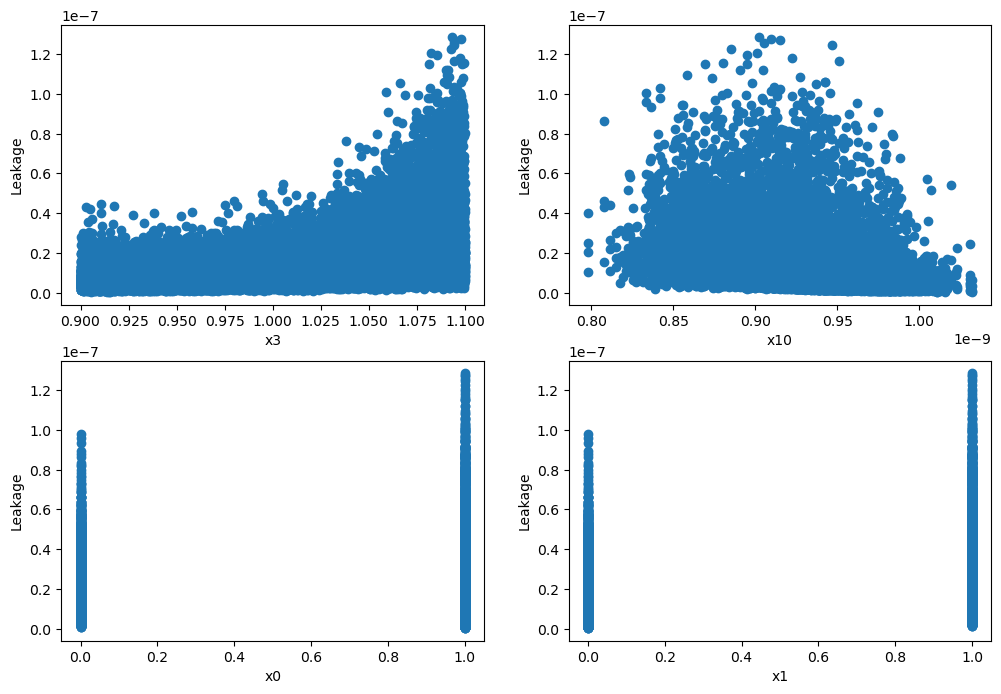

In [30]:
x3, x10, x0, x1 = x[:, 3], x[:, 10], x[:, 0], x[:, 1]

# plot containing 4 subplots of x3,x10,x0,x1 vs leakage
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)    
plt.scatter(x3, y)
plt.xlabel('x3')
plt.ylabel('Leakage')

plt.subplot(2, 2, 2)
plt.scatter(x10, y)
plt.xlabel('x10')
plt.ylabel('Leakage')

plt.subplot(2, 2, 3)
plt.scatter(x0, y)
plt.xlabel('x0')
plt.ylabel('Leakage')

plt.subplot(2, 2, 4)
plt.scatter(x1, y)
plt.xlabel('x1')
plt.ylabel('Leakage')


##### Exponential Relationship: Leakage power might increase exponentially with temperature. So we can use logarithmic bases to convert the exponential relationship into a linear one for the model to learn more effectively.

##### Voltage-Temperature Interaction: Leakage power might be influenced by the combined effect of temperature and voltage. So we explore interactions like voltage * temperature or voltage**2 / temperature to capture this potential interaction.

In [31]:
def create_new_features(x):
  scaler = StandardScaler()
  x_scaled = scaler.fit_transform(x)

  epsilon = 1e-8  # Small positive value to avoid -1
  clipped_temperature = np.clip(x_scaled[:, 3], epsilon, np.inf) 

  # Logarithm of clipped temperature
  log_temperature = np.log1p(clipped_temperature)
  voltage_squared = x_scaled[:, 0] * x_scaled[:, 1]                   # Voltage squared
  voltage_temperature_interaction = x_scaled[:, 1] * x_scaled[:, 3]   # Temperature-voltage interaction

  # Combine original features and transformations
  new_features = np.concatenate((x_scaled, log_temperature[:, np.newaxis],
                                voltage_squared[:, np.newaxis],
                                voltage_temperature_interaction[:, np.newaxis]), axis=1)
  return new_features

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Engineering
x_train_new = create_new_features(x_train)
x_test_new = create_new_features(x_test)
x_train_new.shape, x_test_new.shape


((28000, 21), (12000, 21))

In [33]:
mse_lr_ft, r2_lr_ft = train_and_test(LinearRegression(), x_train_new, y_train)
mse_ada_ft, r2_ada_ft = train_and_test(AdaBoostRegressor(random_state=42), x_train_new, y_train)
mse_lgb_ft, r2_lgb_ft = train_and_test(lgb.LGBMRegressor(), x_train_new, y_train)
mse_catboost_ft, r2_catboost_ft = train_and_test(CatBoostRegressor(random_state=42), x_train_new, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4601
[LightGBM] [Info] Number of data points in the train set: 19600, number of used features: 21
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.065517
0:	learn: 0.0000000	total: 3.02ms	remaining: 3.02s
1:	learn: 0.0000000	total: 6.38ms	remaining: 3.18s
2:	learn: 0.0000000	total: 9.89ms	remaining: 3.29s
3:	learn: 0.0000000	total: 13.3ms	remaining: 3.31s
4:	learn: 0.0000000	total: 17.3ms	remaining: 3.45s
5:	learn: 0.0000000	total: 21.8ms	remaining: 3.62s
6:	learn: 0.0000000	total: 26.8ms	remaining: 3.8s
7:	learn: 0.0000000	total: 31ms	remaining: 3.84s
8:	learn: 0.0000000	total: 34ms	remaining: 3.74s
9:	learn: 0.0000000	total: 37.1ms	remaining: 3.67s
10:	learn: 0.0000000	total: 42.3ms	remaining: 3.8s
11:	learn: 0.0000000	total: 47.6ms	remaining: 3.92s
12:	learn: 0.0000000

In [34]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_ft)
print("  R2 Score:", r2_lr_ft)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_ft)
print("  R2 Score:", r2_ada_ft)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_ft)
print("  R2 Score:", r2_lgb_ft)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_ft)
print("  R2 Score:", r2_catboost_ft)

r2_scores_with_feature_engineering = [r2_lr_ft, r2_ada_ft, r2_lgb_ft, r2_catboost_ft]
mse_scores_with_feature_engineering = [mse_lr_ft, mse_ada_ft, mse_lgb_ft, mse_catboost_ft]


Linear Regression:
  Mean Squared Error: 4.406822304863198e-17
  R2 Score: 0.6184011312639238

AdaBoost:
  Mean Squared Error: 8.101457412739788e-17
  R2 Score: 0.2984725114957927

LightGBM:
  Mean Squared Error: 2.2382991891999985e-18
  R2 Score: 0.980617951453386

CatBoost:
  Mean Squared Error: 7.012882755016628e-19
  R2 Score: 0.9939273518631785


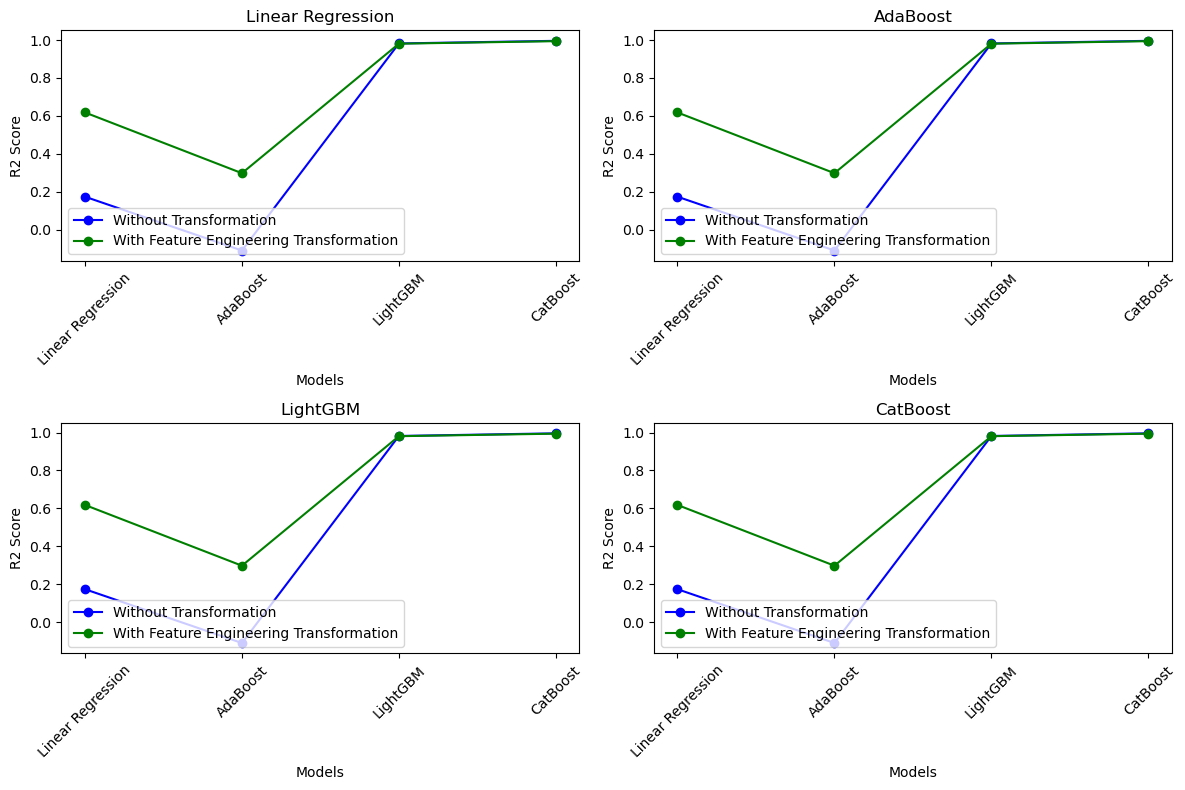

In [35]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_feature_engineering, model_names, "Feature Engineering")

> LightGBM and CatBoost are decision tree-based algorithms that can inherently handle non-linear relationships between features and the target variable. The transformations applied might have already been captured to some extent by their internal decision tree structures.

> While the transformations might have helped linear regression and AdaBoost learn the non-linearity, LightGBM and CatBoost might have already learned similar patterns without this explicit transformation.

In [36]:
def create_new_features(x):
  scaler = StandardScaler()
  x_scaled = scaler.fit_transform(x)

  epsilon = 1e-8  
  clipped_temperature = np.clip(x_scaled[:, 3], epsilon, np.inf) 

  # Logarithm of clipped temperature
  reciprocal_temperature = 1/2*clipped_temperature
  voltage_tox = x_scaled[:, 10]**4  + x_scaled[:, 1]*x_scaled[:,1]           # Voltage squared
  tox_temperature_interaction = x_scaled[:, 10]/clipped_temperature        # Temperature-voltage interaction

  # Combine original features and transformations
  new_features = np.concatenate((x_scaled, reciprocal_temperature[:, np.newaxis],
                                voltage_tox[:, np.newaxis],
                                tox_temperature_interaction[:, np.newaxis]), axis=1)
  return new_features

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Engineering
x_train_new = create_new_features(x_train)
x_test_new = create_new_features(x_test)
x_train_new.shape, x_test_new.shape

((28000, 21), (12000, 21))

In [38]:

mse_lr_ft2, r2_lr_ft2 = train_and_test(LinearRegression(), x_train_new, y_train)
mse_ada_ft2, r2_ada_ft2 = train_and_test(AdaBoostRegressor(random_state=42), x_train_new, y_train)
mse_lgb_ft2, r2_lgb_ft2 = train_and_test(lgb.LGBMRegressor(), x_train_new, y_train)
mse_catboost_ft2, r2_catboost_ft2 = train_and_test(CatBoostRegressor(random_state=42), x_train_new, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4851
[LightGBM] [Info] Number of data points in the train set: 19600, number of used features: 21
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.065517
0:	learn: 0.0000000	total: 3.83ms	remaining: 3.83s
1:	learn: 0.0000000	total: 8.21ms	remaining: 4.09s
2:	learn: 0.0000000	total: 12.6ms	remaining: 4.18s
3:	learn: 0.0000000	total: 15.6ms	remaining: 3.87s
4:	learn: 0.0000000	total: 18.5ms	remaining: 3.68s
5:	learn: 0.0000000	total: 21.2ms	remaining: 3.52s
6:	learn: 0.0000000	total: 26.5ms	remaining: 3.76s
7:	learn: 0.0000000	total: 32.4ms	remaining: 4.02s
8:	learn: 0.0000000	total: 35.7ms	remaining: 3.93s
9:	learn: 0.0000000	total: 38.6ms	remaining: 3.83s
10:	learn: 0.0000000	total: 41.3ms	remaining: 3.71s
11:	learn: 0.0000000	total: 43.8ms	remaining: 3.6s
12:	learn: 0.00

In [39]:

print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_ft2)
print("  R2 Score:", r2_lr_ft2)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_ft2)
print("  R2 Score:", r2_ada_ft2)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_ft2)
print("  R2 Score:", r2_lgb_ft2)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_ft2)
print("  R2 Score:", r2_catboost_ft2)

r2_scores_with_feature_engineering2 = [r2_lr_ft2, r2_ada_ft2, r2_lgb_ft2, r2_catboost_ft2]
mse_scores_with_feature_engineering2 = [mse_lr_ft2, mse_ada_ft2, mse_lgb_ft2, mse_catboost_ft2]


Linear Regression:
  Mean Squared Error: 4.7920378433305316e-17
  R2 Score: 0.5850442578686721

AdaBoost:
  Mean Squared Error: 9.539449278844491e-17
  R2 Score: 0.1739528391796047

LightGBM:
  Mean Squared Error: 2.671120386062034e-18
  R2 Score: 0.9768700336191389

CatBoost:
  Mean Squared Error: 8.44942492045596e-19
  R2 Score: 0.9926834104757113


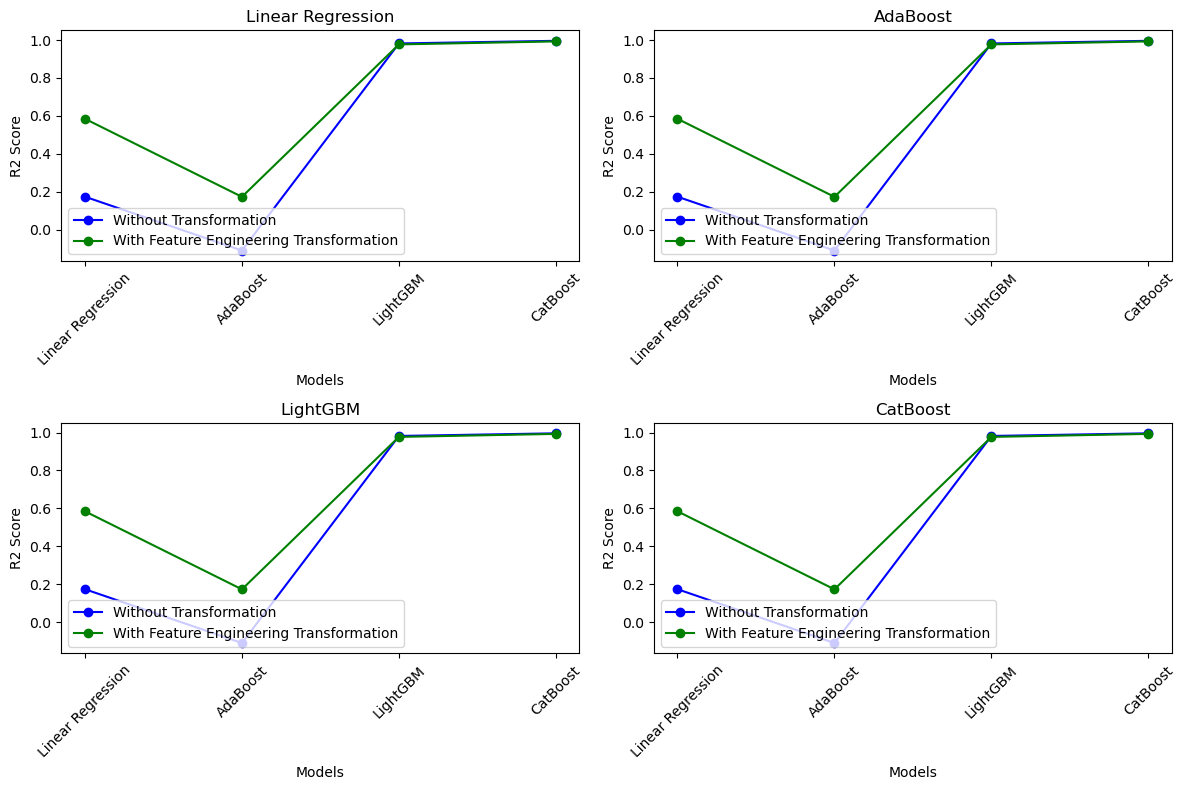

In [40]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_feature_engineering2, model_names, "Feature Engineering")

> It is likely that the transformations are not fixing the non linear relationships much, hence only Linear Regression and Adaboost improve, LightGBM and CatBoost remain the same.

### Recursive Feature Elimination


##### RFE can potentially smaller subset of important features. This can improve model interpretability and potentially reduce overfitting

In [41]:
feature_ranking_df

,Feature,Importance
0,feature 0,512
1,feature 1,494
2,feature 2,384
3,feature 3,377
4,feature 4,374
5,feature 5,334
6,feature 6,158
7,feature 7,126
8,feature 8,84
9,feature 9,45


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select 10 features, remove 1 at a time
selector = RFE(estimator=LinearRegression(), n_features_to_select=15, step=1)  
selector.fit(x, y)
support = selector.support_
selected_features = x[:, support]  # Features selected by RFE

# Use selected_features for further modeling
mse_lr_rfe, r2_lr_rfe = train_and_test(LinearRegression(), selected_features, y)
mse_ada_rfe, r2_ada_rfe = train_and_test(AdaBoostRegressor(random_state=42), selected_features, y)
mse_lgb_rfe, r2_lgb_rfe = train_and_test(lgb.LGBMRegressor(), selected_features, y)
mse_catboost_rfe, r2_catboost_rfe = train_and_test(CatBoostRegressor(random_state=42), selected_features, y)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 15
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 7.71ms	remaining: 7.7s
1:	learn: 0.0000000	total: 13.3ms	remaining: 6.63s
2:	learn: 0.0000000	total: 18.8ms	remaining: 6.26s
3:	learn: 0.0000000	total: 24.7ms	remaining: 6.15s
4:	learn: 0.0000000	total: 27.8ms	remaining: 5.53s
5:	learn: 0.0000000	total: 30.4ms	remaining: 5.03s
6:	learn: 0.0000000	total: 32.8ms	remaining: 4.65s
7:	learn: 0.0000000	total: 35.2ms	remaining: 4.36s
8:	learn: 0.0000000	total: 40.7ms	remaining: 4.48s
9:	learn: 0.0000000	total: 44.7ms	remaining: 4.42s
10:	learn: 0.0000000	total: 47.4ms	remaining: 4.26s
11:	learn: 0.0000000	total: 50.3ms	remaining: 4.14s
12:	learn: 0.00

In [43]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_rfe)
print("  R2 Score:", r2_lr_rfe)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_rfe)
print("  R2 Score:", r2_ada_rfe)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_rfe)
print("  R2 Score:", r2_lgb_rfe)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_rfe)
print("  R2 Score:", r2_catboost_rfe)

r2_scores_with_rfe = [r2_lr_rfe, r2_ada_rfe, r2_lgb_rfe, r2_catboost_rfe]
mse_scores_with_rfe = [mse_lr_rfe, mse_ada_rfe, mse_lgb_rfe, mse_catboost_rfe]

Linear Regression:
  Mean Squared Error: 1.0155235199254718e-16
  R2 Score: 0.17449674089189293

AdaBoost:
  Mean Squared Error: 1.359734689177033e-16
  R2 Score: -0.10530715972030502

LightGBM:
  Mean Squared Error: 5.390306644265317e-17
  R2 Score: 0.5618303648191563

CatBoost:
  Mean Squared Error: 5.904804469062553e-17
  R2 Score: 0.5200076376404377


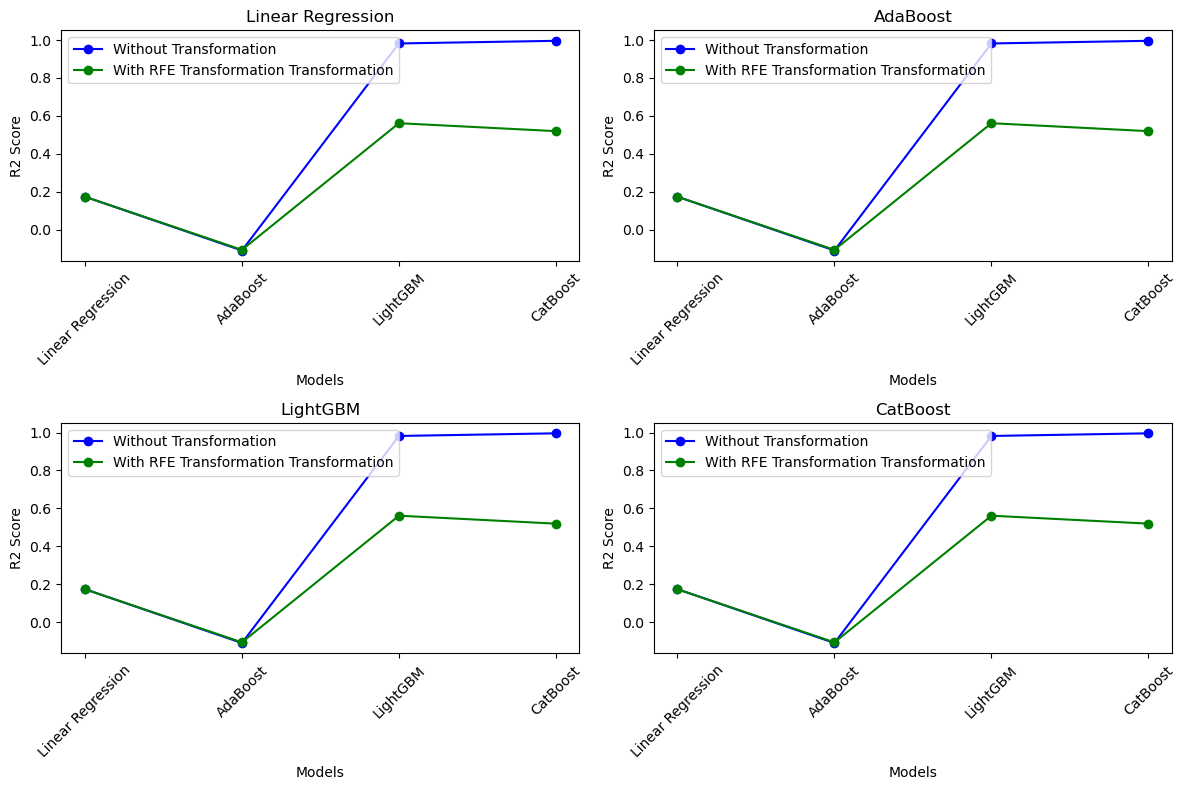

In [44]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_rfe, model_names, "RFE Transformation")


### Quantile Transformer

This transformation scales features to a specific range (often 0-1) based on quantiles. It preserves the distribution of the data more closely compared to scaling techniques like StandardScaler.

Applications: Useful for models sensitive to feature scaling or to ensure features fall within a specific range. It can also be helpful for dealing with skewed data distributions. 


Quartiles divide data into four equal parts. The first quartile (Q1) is the value at which 25% of the data falls below it. The second quartile (Q2), also known as the median, is the value that splits the data in half. The third quartile (Q3) is the value at which 75% of the data falls below it.

**Mapping Values:** Based on the calculated quartiles, assign a new value to each data point in your dataset. Different quartile transformation methods exist, but here's a common approach:

**For values less than Q1:** Map them to a new value between 0 and 1, proportionally based on their distance from the minimum value (Min). You can use linear interpolation or other techniques.

**For values between Q1 and Q3:** Map them to a new value between 0.25 and 0.75, again proportionally based on their position between Q1 and Q3.

**For values greater than Q3:** Map them to a new value between 0.75 and 1, proportionally based on their distance from the maximum value (Max).

In [45]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='uniform')  
x_qt = transformer.fit_transform(x)

In [46]:
mse_lr_qt, r2_lr_qt = train_and_test_linear_reg(x_qt, y)
mse_ada_qt, r2_ada_qt = train_and_test_adaboost(x_qt, y)
mse_lgb_qt, r2_lgb_qt = train_and_test_lightgbm(x_qt, y)
mse_catboost_qt, r2_catboost_qt = train_and_test_catboost(x_qt, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 8.13ms	remaining: 8.12s
1:	learn: 0.0000000	total: 12.5ms	remaining: 6.25s
2:	learn: 0.0000000	total: 16.2ms	remaining: 5.39s
3:	learn: 0.0000000	total: 19.7ms	remaining: 4.9s
4:	learn: 0.0000000	total: 23ms	remaining: 4.58s
5:	learn: 0.0000000	total: 27.6ms	remaining: 4.57s
6:	learn: 0.0000000	total: 33.4ms	remaining: 4.74s
7:	learn: 0.0000000	total: 39.3ms	remaining: 4.88s
8:	learn: 0.0000000	total: 42.1ms	remaining: 4.64s
9:	learn: 0.0000000	total: 44.6ms	remaining: 4.42s
10:	learn: 0.0000000	total: 50.2ms	remaining: 4.51s
11:	learn: 0.0000000	total: 55.9ms	remaining: 4.61s
12:	learn: 0.0000

In [47]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_qt)
print("  R2 Score:", r2_lr_qt)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_qt)
print("  R2 Score:", r2_ada_qt)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_qt)
print("  R2 Score:", r2_lgb_qt)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_qt)
print("  R2 Score:", r2_catboost_qt)

# R2 scores for models with the 'QuantileTransformer' transformation
r2_scores_with_qt = [r2_lr_qt, r2_ada_qt, r2_lgb_qt, r2_catboost_qt]
mse_scores_with_qt = [mse_lr_qt, mse_ada_qt, mse_lgb_qt, mse_catboost_qt]


Linear Regression:
  Mean Squared Error: 5.888184904822635e-17
  R2 Score: 0.5213586161432315

AdaBoost:
  Mean Squared Error: 1.0688874406022851e-16
  R2 Score: 0.13111804057313625

LightGBM:
  Mean Squared Error: 2.024830160479833e-18
  R2 Score: 0.983540470862367

CatBoost:
  Mean Squared Error: 5.201190326206764e-19
  R2 Score: 0.9957720333588725


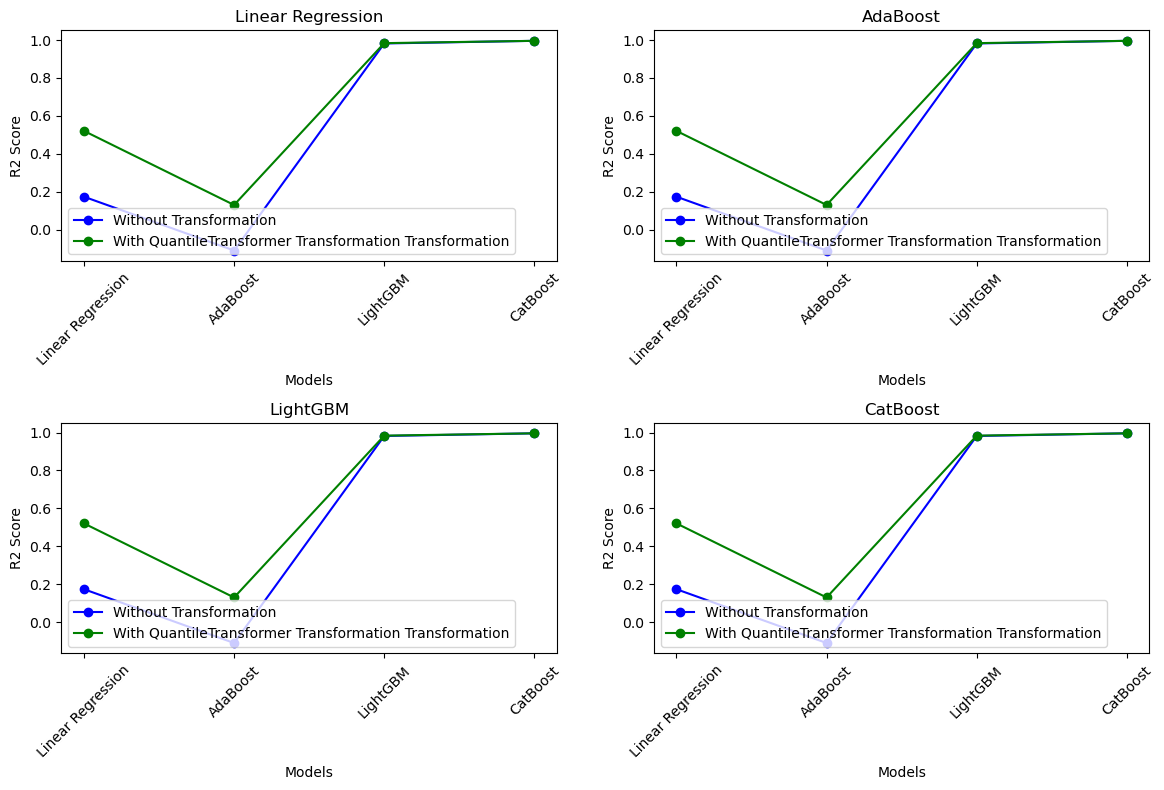

In [48]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_qt, model_names, "QuantileTransformer Transformation")

### Yeo johnson transformation

Yeo Johnson’s transformations technique can be applied to zero and negative values as well. So we apply this on scaled data. Advanced form of box cox transformations technique - boxcox cannot be applied because 0 can also be one of the values in the dataset, but only possible values are allowed for this transformation.

y_lambda+1  = (y+1)^(λ)      for y ≥ 0 and λ ≠ 2
            = ln(y+1)        for y ≥ 0 and λ = 2
            = -(-y+1)^(2-λ)  for y < 0

Here, the constant "1" is added to ensure all values are positive for the power function and logarithmic transformation on the positive side (y ≥ 0). The transformation for negative data (y < 0) uses a mirrored approach with a different power parameter (2 - λ).

In [49]:
# yeo johnson transformation
from scipy.stats import yeojohnson

x_yeo = np.zeros_like(x)
for i in range(x.shape[1]):
    x_yeo[:, i], _ = yeojohnson(x[:, i]) 


In [50]:
mse_lr_yeo, r2_lr_yeo = train_and_test_linear_reg(x_yeo, y)
mse_ada_yeo, r2_ada_yeo = train_and_test_adaboost(x_yeo, y)
mse_lgb_yeo, r2_lgb_yeo = train_and_test_lightgbm(x_yeo, y)
mse_catboost_yeo, r2_catboost_yeo = train_and_test_catboost(x_yeo, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000
Learning rate set to 0.069316
0:	learn: 0.0000000	total: 8.18ms	remaining: 8.17s
1:	learn: 0.0000000	total: 13ms	remaining: 6.5s
2:	learn: 0.0000000	total: 18.6ms	remaining: 6.2s
3:	learn: 0.0000000	total: 21.4ms	remaining: 5.34s
4:	learn: 0.0000000	total: 24.5ms	remaining: 4.87s
5:	learn: 0.0000000	total: 27.6ms	remaining: 4.57s
6:	learn: 0.0000000	total: 32.1ms	remaining: 4.55s
7:	learn: 0.0000000	total: 37.6ms	remaining: 4.66s
8:	learn: 0.0000000	total: 41.7ms	remaining: 4.59s
9:	learn: 0.0000000	total: 47ms	remaining: 4.65s
10:	learn: 0.0000000	total: 53.2ms	remaining: 4.78s
11:	learn: 0.0000000	total: 56.8ms	remaining: 4.67s
12:	learn: 0.0000000

In [51]:
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr_yeo)
print("  R2 Score:", r2_lr_yeo)
print("\nAdaBoost:")
print("  Mean Squared Error:", mse_ada_yeo)
print("  R2 Score:", r2_ada_yeo)
print("\nLightGBM:")
print("  Mean Squared Error:", mse_lgb_yeo)
print("  R2 Score:", r2_lgb_yeo)
print("\nCatBoost:")
print("  Mean Squared Error:", mse_catboost_yeo)
print("  R2 Score:", r2_catboost_yeo)

# R2 scores for models with the 'Yeo-Johnson' transformation
r2_scores_with_yeo = [r2_lr_yeo, r2_ada_yeo, r2_lgb_yeo, r2_catboost_yeo]
mse_scores_with_yeo = [mse_lr_yeo, mse_ada_yeo, mse_lgb_yeo, mse_catboost_yeo]

Linear Regression:
  Mean Squared Error: 1.2304155104139899e-16
  R2 Score: -0.0001856126172792294

AdaBoost:
  Mean Squared Error: 1.2602067692105804e-16
  R2 Score: -0.024402463086014015

LightGBM:
  Mean Squared Error: 2.2366763187613596e-18
  R2 Score: 0.9818184064230937

CatBoost:
  Mean Squared Error: 5.300580278575837e-19
  R2 Score: 0.9956912408139502


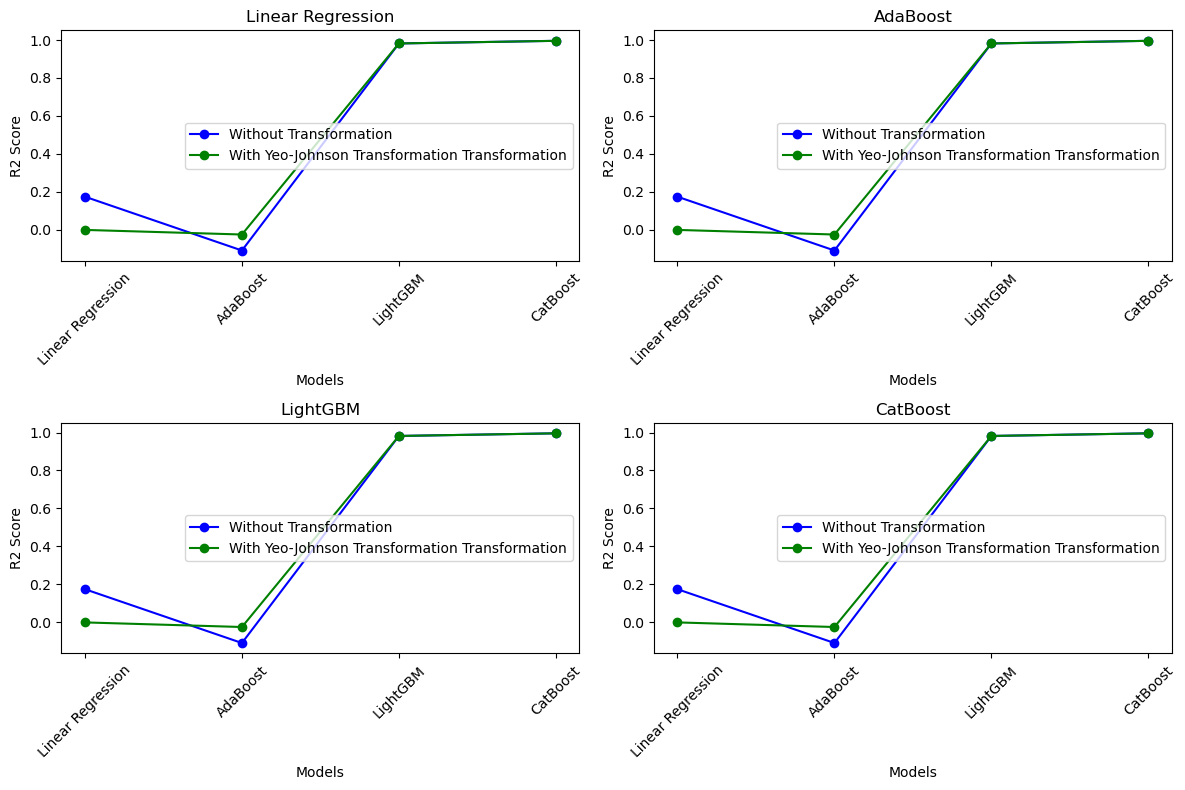

In [52]:
plot_r2_scores_for_transformation(r2_scores_no_transformation, r2_scores_with_yeo, model_names, "Yeo-Johnson Transformation")


> The relationship between the features and the target variable was already close to linear, the transformation might not significantly improve the R-squared score in case of LInear Regression. In some cases, the transformation itself might introduce non-linearity that linear regression can't capture effectively, potentially leading to a decrease in R-squared.

> AdaBoost is a decision-tree-based ensemble method that can inherently handle non-linear relationships between features and the target variable. The Yeo-Johnson transformation might not have significantly altered the data for AdaBoost if the model had already learned the relevant patterns using the original features.
However, if the transformation uncovered some underlying non-linearity that was subtle in the original data, it could have benefitted AdaBoost, leading to a higher R-squared score.

#### Visualisation

In [53]:
# Models and transformations
models = ['Linear Regression', 'AdaBoost', 'LightGBM', 'CatBoost']
transformations = ['None', 'PCA', 'Standard Scaling', 'Feature Engineering' , 'Feature Engineering2','Quantile Transformer', 'Yeo-Johnson']

# R2 scores for all models and transformations
r2_scores = [r2_scores_no_transformation, r2_scores_with_pca, r2_scores_with_ss, r2_scores_with_feature_engineering, r2_scores_with_feature_engineering2, r2_scores_with_qt, r2_scores_with_yeo]
mse_scores = [mse_scores_no_transformation, mse_scores_with_pca, mse_scores_with_ss,  mse_scores_with_feature_engineering, mse_scores_with_feature_engineering2, mse_scores_with_qt, mse_scores_with_yeo]

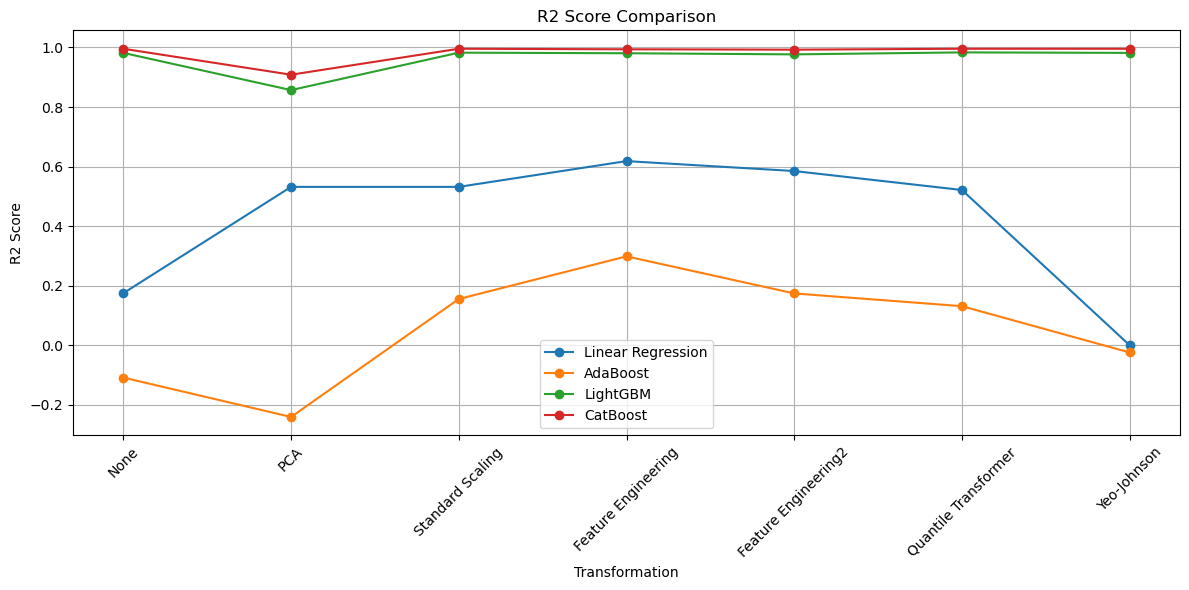

In [54]:
# Plotting R2 scores
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.plot(transformations, [scores[i] for scores in r2_scores], marker='o', label=model)

plt.title('R2 Score Comparison')
plt.xlabel('Transformation')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

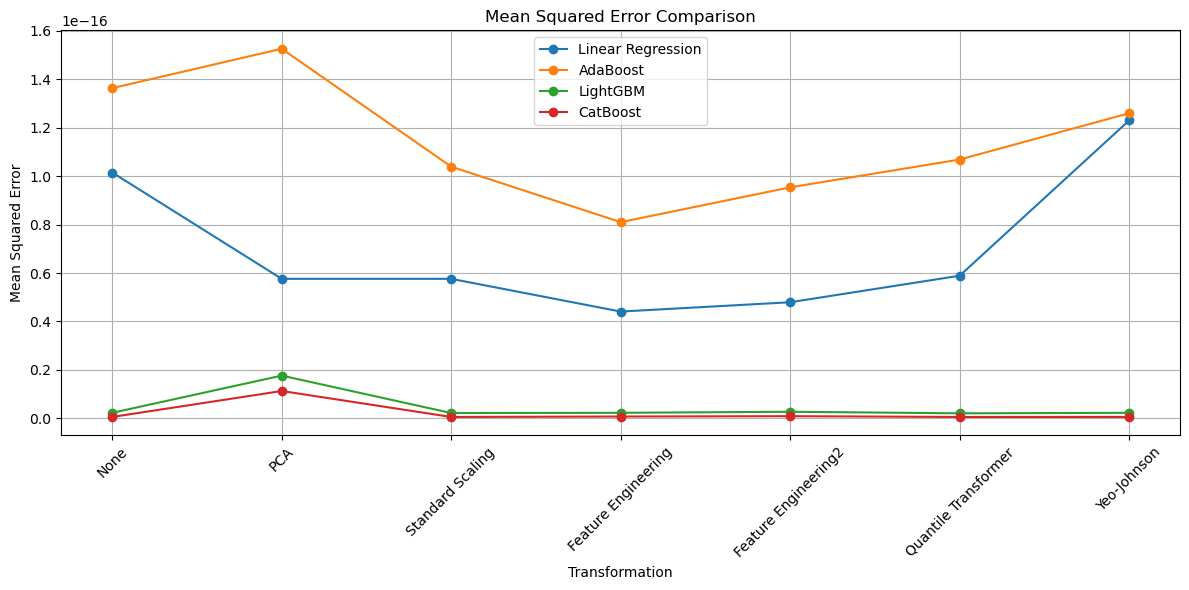

In [55]:

# Plotting MSE scores
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.plot(transformations, [scores[i] for scores in mse_scores], marker='o', label=model)
    
plt.title('Mean Squared Error Comparison')
plt.xlabel('Transformation')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
        


In [59]:
# print the best r2 for each model and for which transformation
# linear regression
best_r2_lr = max(r2_lr, r2_lr_ss, r2_lr_pca, r2_lr_ft, r2_lr_ft2, r2_lr_qt, r2_lr_yeo)
best_transformation_index_lr = [r2_lr, r2_lr_ss, r2_lr_pca, r2_lr_ft, r2_lr_ft2, r2_lr_qt, r2_lr_yeo].index(best_r2_lr)
best_transformation_lr = transformations[best_transformation_index_lr]

# adaboost
best_r2_ada = max(r2_ada, r2_ada_ss, r2_ada_pca, r2_ada_ft, r2_ada_ft2, r2_ada_qt, r2_ada_yeo)
best_transformation_index_ada = [r2_ada, r2_ada_ss, r2_ada_pca, r2_ada_ft, r2_ada_ft2, r2_ada_qt, r2_ada_yeo].index(best_r2_ada)
best_transformation_ada = transformations[best_transformation_index_ada]

# lightgbm
best_r2_lgb = max(r2_lgb, r2_lgb_ss, r2_lgb_pca, r2_lgb_ft, r2_lgb_ft2, r2_lgb_qt, r2_lgb_yeo)
best_transformation_index_lgb = [r2_lgb, r2_lgb_ss, r2_lgb_pca, r2_lgb_ft, r2_lgb_ft2, r2_lgb_qt, r2_lgb_yeo].index(best_r2_lgb)
best_transformation_lgb = transformations[best_transformation_index_lgb]

# catboost
best_r2_catboost = max(r2_catboost, r2_catboost_ss, r2_catboost_pca, r2_catboost_ft, r2_catboost_ft2, r2_catboost_qt, r2_catboost_yeo)
best_transformation_index_catboost = [r2_catboost, r2_catboost_ss, r2_catboost_pca, r2_catboost_ft, r2_catboost_ft2, r2_catboost_qt, r2_catboost_yeo].index(best_r2_catboost)
best_transformation_catboost = transformations[best_transformation_index_catboost]

print("Best R2 Score for Linear Regression:", best_r2_lr)
print("Best Transformation for LinearRegression:", best_transformation_lr)

print("\nBest R2 Score for AdaBoost:", best_r2_ada)
print("Best Transformation for AdaBoost:", best_transformation_ada)

print("\nBest R2 Score for LightGBM:", best_r2_lgb)
print("Best Transformation for LightGBM:", best_transformation_lgb)

print("\nBest R2 Score for CatBoost:", best_r2_catboost)
print("Best Transformation for CatBoost:", best_transformation_catboost)

Best R2 Score for Linear Regression: 0.6184011312639238
Best Transformation for LinearRegression: Feature Engineering

Best R2 Score for AdaBoost: 0.2984725114957927
Best Transformation for AdaBoost: Feature Engineering

Best R2 Score for LightGBM: 0.983540470862367
Best Transformation for LightGBM: Quantile Transformer

Best R2 Score for CatBoost: 0.9957720831569056
Best Transformation for CatBoost: PCA
